In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class PriorityQueue():
    def __init__(self,item,cost):
        self.items = {cost:[item]}
        self.costs = {cost}

    def isEmpty(self):
        return self.items == {}

    def dequeue(self):
        least_cost = sorted(self.costs)[0]
        item = self.items[least_cost].pop(0)

        if len(self.items[least_cost]) == 0:
            self.costs.remove(least_cost)
            del self.items[least_cost]

        return item
    def enqueue(self,item,cost):
        if cost in self.costs:
            self.items[cost].append(item)

        else:
            self.items[cost] = [item]
            self.costs.add(cost)

    def update_cost(self,item,old_cost,new_cost):
        #print(old_cost)
        for i in self.items[old_cost]:
            if i.board_config == item.board_config:
                self.items[old_cost].remove(i)
                break
        if len(self.items[old_cost]) == 0:
            self.costs.remove(old_cost)
            del self.items[old_cost]
        if new_cost in self.costs:
            self.items[new_cost].append(item)

        else:
            self.items[new_cost] = [item]
            self.costs.add(new_cost)


In [ ]:
class State():
        right=(0,1,3,4,6,7)
        left=(1,2,4,5,7,8)
        up=(3,4,5,6,7,8,)
        down=(0,1,2,3,4,5)

        def __init__(self,board_config,parent,move,depth):
           self.board_config = board_config
           self.board_config_list = list(map(int,board_config.split(',')))
           self.i = self.board_config_list.index(0)
           self.parents = parent
           self.move = move
           self.depth = depth
          # print('Constructor called')

        def get_children(self):
            children = []
            if self.i in State.right:
                new_config = self.board_config_list[:]
                new_config[self.i],new_config[self.i+1]=new_config[self.i+1], new_config[self.i]
                children.append(State(','.join(map(str,new_config)),self.board_config,'Right',self.depth+1))
            if self.i in State.left:
                new_config = self.board_config_list[:]
                new_config[self.i],new_config[self.i-1]=new_config[self.i-1], new_config[self.i]
                children.append(State(','.join(map(str,new_config)),self.board_config,'Left',self.depth+1))
            if self.i in State.up:
                new_config = self.board_config_list[:]
                new_config[self.i],new_config[self.i-3]=new_config[self.i-3], new_config[self.i]
                children.append(State(','.join(map(str,new_config)),self.board_config,'Up',self.depth+1))
            if self.i in State.down:
                new_config = self.board_config_list[:]
                new_config[self.i],new_config[self.i+3]=new_config[self.i+3], new_config[self.i]
                children.append(State(','.join(map(str,new_config)),self.board_config,'Down',self.depth+1))
               # print(children)
            return children
        def plot_8_puzzle(self):
            board = np.array([int(x) for x in self.board_config.split(',')]).reshape(3, 3)

            fig, ax = plt.subplots()
            ax.matshow(board)

            for i in range(3):
                for j in range(3):
                    ax.text(j, i, str(board[i, j]), va='center', ha='center', fontsize=20, color='black')

            plt.title('8 Puzzle')
            plt.show()
        def __str__(self):
            return self.board_config

In [ ]:
def manhattan_dist(x,y):
   # print('j')
    return abs(x[0]-y[0])+abs(x[1]-y[1])

indexes = {0:(0,0), 1:(0,1),2:(0,2),3:(1,0),4:(1,1),5:(1,2), 6:(2,0), 7:(2,1),8:(2,2)}


In [ ]:
def h(s):
   s = s.split(',')
   dist=0
 #  print('k')
   for each in s :
       i = s.index(each)
       x = indexes[i]
#       print('l')
       y = indexes[int(each)]
       dist = dist + manhattan_dist(x,y)

    return dist


In [ ]:
h("0,5,3,8,2,1,7,4,6")

In [ ]:
def ast(inp,goal):
        frontier = PriorityQueue(inp,h(inp.board_config))
        frontier_dict = {inp.board_config:h(inp.board_config)}
        graph = {}

        explored = set()

        while not frontier.isEmpty():
            state = frontier.dequeue()
            explored.add(state.board_config)
            del frontier_dict[state.board_config]
            graph[state.board_config] = state
            if state.board_config == goal:
               path = []
               current_state = state
               print(h(goal))
               while not current_state.parents == None:
                    current_state.plot_8_puzzle()
                    path.append(current_state.move)
                    current_state =graph[current_state.parents]
                 #   print('n')
               return print (path, len(path))


            else:
               # print('st')
                a = state.get_children()


                for children in a:
                #     print(children.board_config)
                     #print (frontier)
                     cost= h(children.board_config)+ children.depth

                     if children.board_config not in frontier_dict and children.board_config not in explored:
                        frontier.enqueue(children,cost)
                        #print('o')
                        frontier_dict[children.board_config]= cost
                        #print('v')
                        if children.board_config in frontier_dict:
                        # new_cost = cost
                        #old_cost = frontier_dict[children.board_config]
                         if cost < frontier_dict[children.board_config]:
                             frontier.update_cost(children,frontier_dict[children.board_config],cost)
                         #    print('p')

        return' failure'

In [ ]:
inp= State('5,3,0,7,1,2,8,4,6',None,None,0)

0


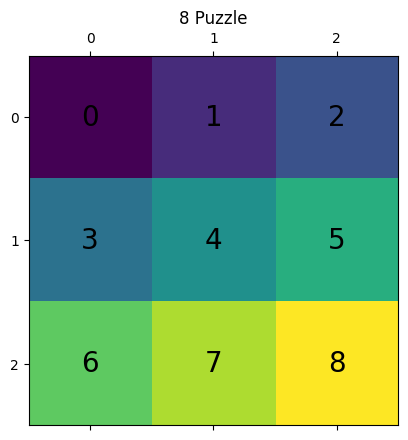

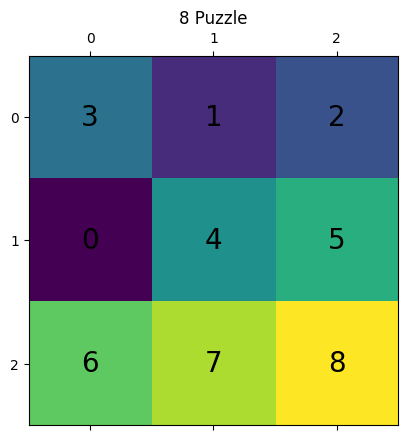

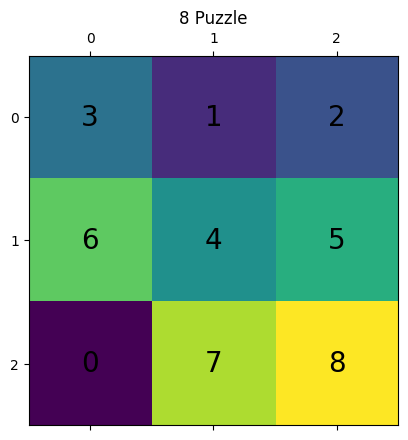

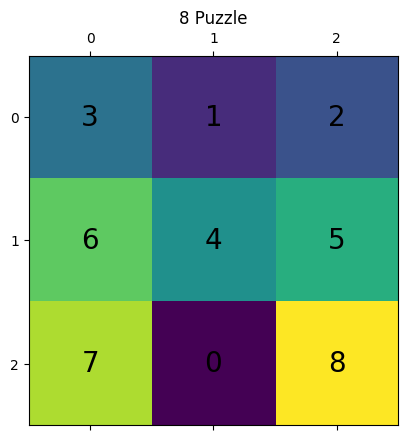

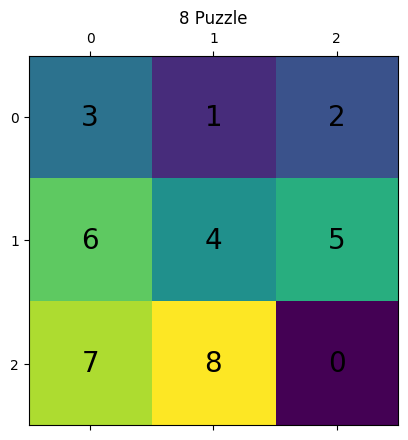

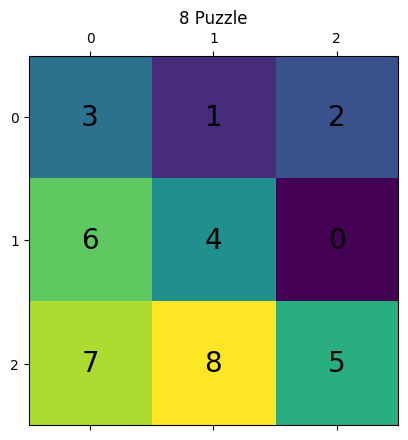

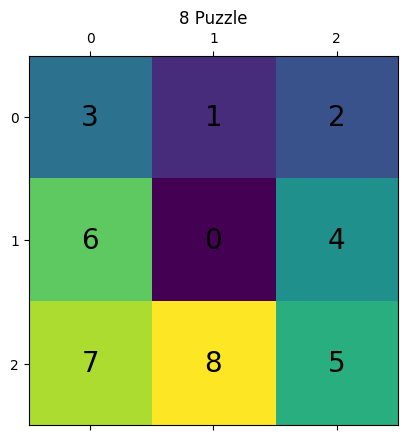

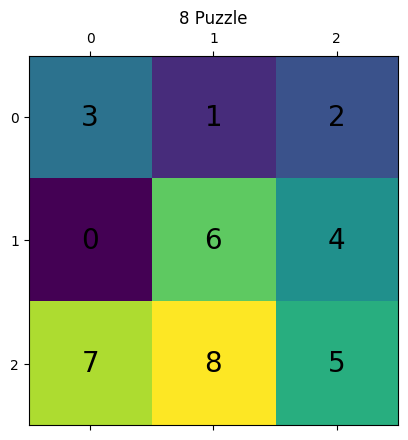

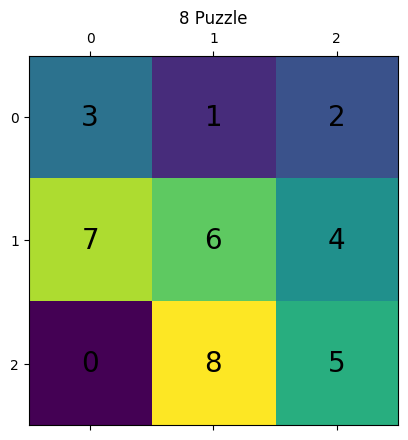

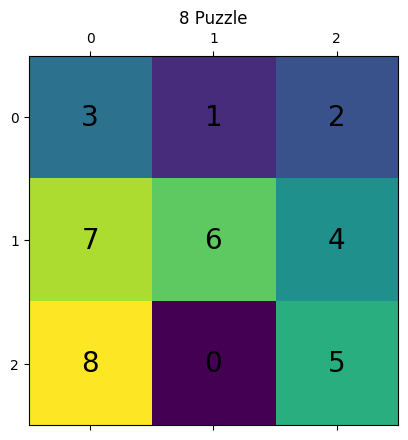

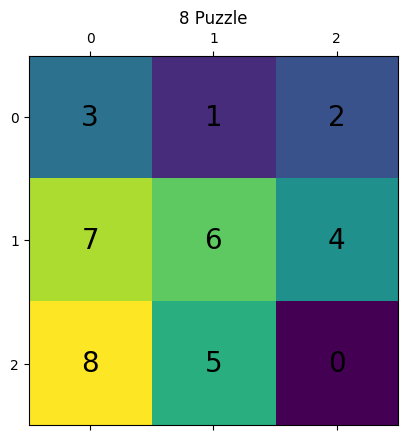

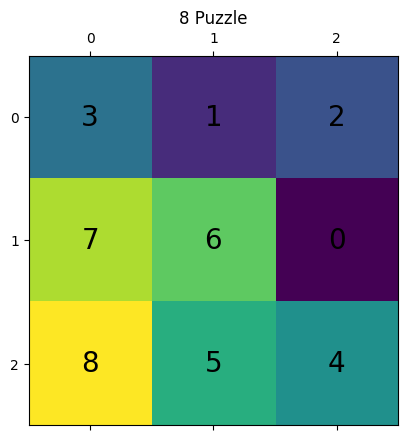

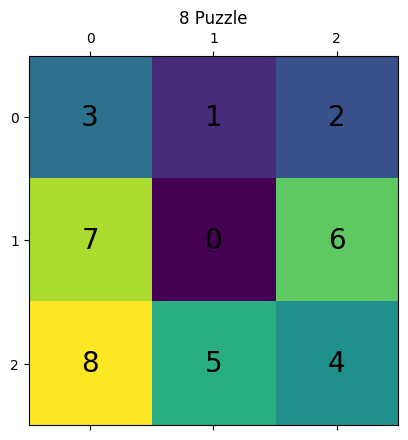

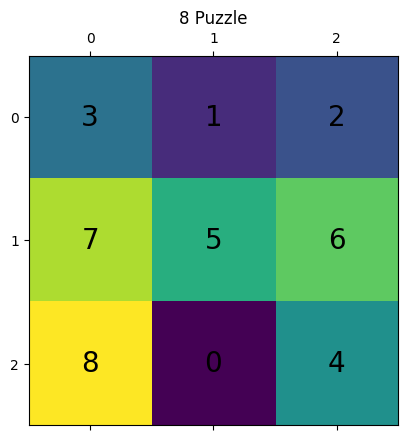

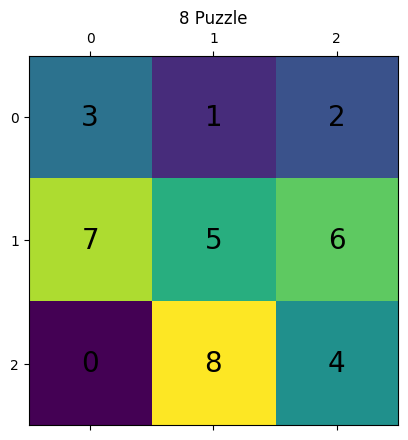

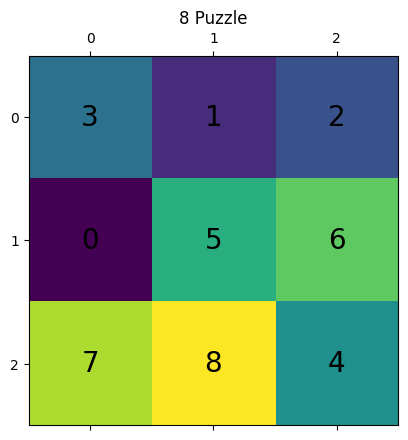

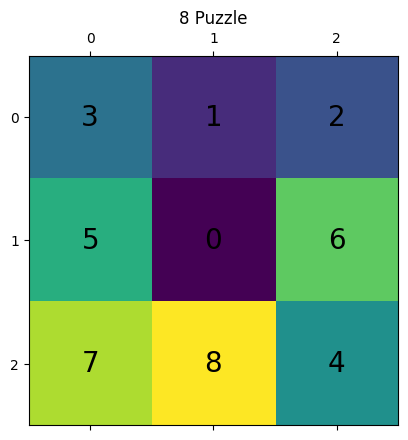

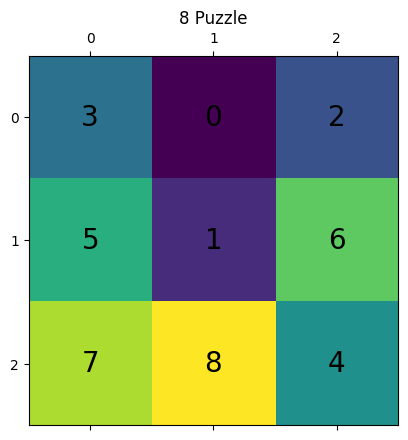

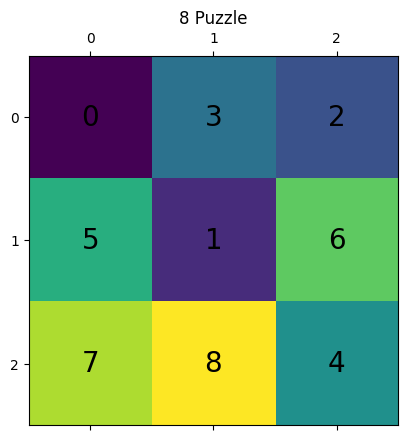

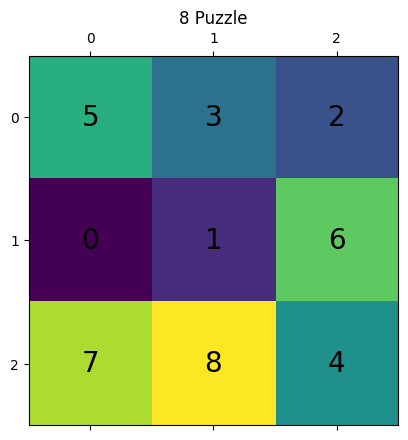

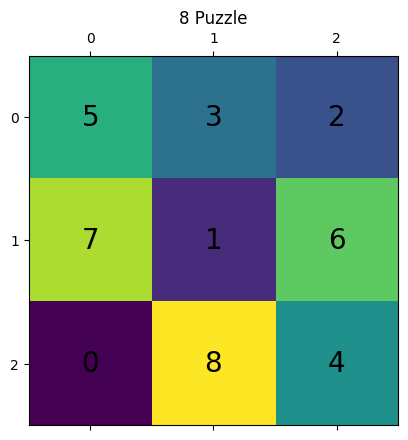

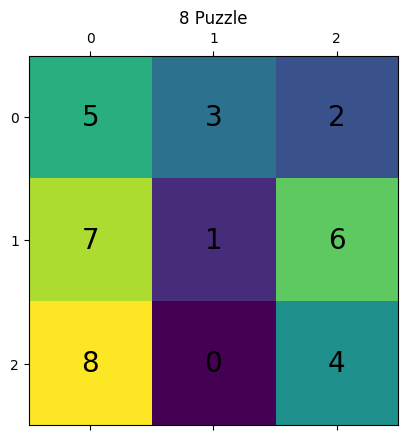

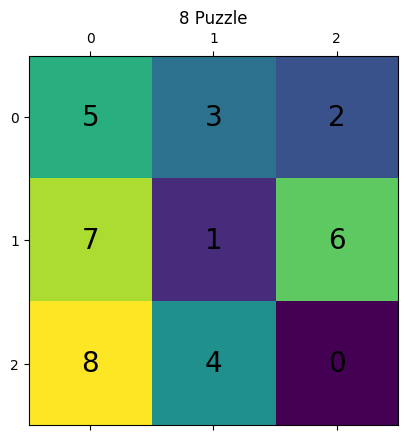

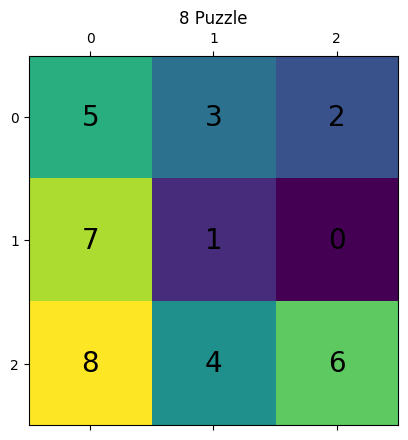

['Up', 'Up', 'Left', 'Left', 'Down', 'Right', 'Right', 'Up', 'Left', 'Left', 'Down', 'Right', 'Up', 'Right', 'Down', 'Left', 'Down', 'Right', 'Up', 'Up', 'Left', 'Left', 'Down', 'Down'] 24
None
9.857656717300415


In [ ]:
import time
s=time.time()
print(ast(inp,'0,1,2,3,4,5,6,7,8'))
e=time.time()
t=e-s
print(t)


{'brand': 'Ford', 'model': 'Mustang', 'year': [1, 2, 3]}


3

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from functools import reduce

ps = PorterStemmer()

sentence = "gaming,the gamers play games"
words = word_tokenize(sentence)

# using reduce to apply stemmer to each word and join them back into a string
stemmed_sentence = reduce(lambda x, y: x + " " + ps.stem(y), words, "")

print(stemmed_sentence)

 game , the gamer play game
